Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PostCovidDepressionRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(191, 9)
(191, 9)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,depression,It sucks when you wake up and the only thing y...,The first 6 words of the title is accurate too.,This is me the past few years.,3807,103,2021-05-10 14:07:07,n959fs
1,1,depression,How do you tell someone... I'm not ignoring yo...,NaN,For me personally receiving that text would be...,3445,101,2021-01-14 15:16:17,kx7k2a
2,2,depression,Isn't it amazing that everyone who's never had...,It's always some great 1 off line that they th...,That's because people who have never been depr...,3430,127,2021-03-16 03:27:37,m5zy12
3,3,depression,I hate 'foggy brain syndrome',Does anyone else feel like their mind isn't as...,you’re describing exactly what i’m going through,3416,198,2021-02-09 21:16:43,lgdpee
4,4,depression,I think that the worst part of depression is t...,The point I realised that I think I collapsed ...,"I feel that way while at work, I just want the...",3056,60,2021-02-18 17:15:50,lmrsbh


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/191 [00:00<?, ?it/s]

In [4]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.135,0.865,0.000,-0.3612,depression,It sucks when you wake up and the only thing y...,The first 6 words of the title is accurate too.,This is me the past few years.,3807,103,2021-05-10 14:07:07,n959fs
1,1,0.104,0.846,0.050,-0.3382,depression,How do you tell someone... I'm not ignoring yo...,NaN,For me personally receiving that text would be...,3445,101,2021-01-14 15:16:17,kx7k2a
2,2,0.077,0.498,0.425,0.9323,depression,Isn't it amazing that everyone who's never had...,It's always some great 1 off line that they th...,That's because people who have never been depr...,3430,127,2021-03-16 03:27:37,m5zy12
3,3,0.552,0.448,0.000,-0.5719,depression,I hate 'foggy brain syndrome',Does anyone else feel like their mind isn't as...,you’re describing exactly what i’m going through,3416,198,2021-02-09 21:16:43,lgdpee
4,4,0.262,0.738,0.000,-0.8316,depression,I think that the worst part of depression is t...,The point I realised that I think I collapsed ...,"I feel that way while at work, I just want the...",3056,60,2021-02-18 17:15:50,lmrsbh


In [5]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.000,1.000,0.000,0.0000,depression,It sucks when you wake up and the only thing y...,The first 6 words of the title is accurate too.,This is me the past few years.,3807,103,2021-05-10 14:07:07,n959fs
1,1,0.000,1.000,0.000,0.0000,depression,How do you tell someone... I'm not ignoring yo...,NaN,For me personally receiving that text would be...,3445,101,2021-01-14 15:16:17,kx7k2a
2,2,0.077,0.637,0.286,0.9741,depression,Isn't it amazing that everyone who's never had...,It's always some great 1 off line that they th...,That's because people who have never been depr...,3430,127,2021-03-16 03:27:37,m5zy12
3,3,0.108,0.792,0.101,-0.6655,depression,I hate 'foggy brain syndrome',Does anyone else feel like their mind isn't as...,you’re describing exactly what i’m going through,3416,198,2021-02-09 21:16:43,lgdpee
4,4,0.142,0.766,0.093,-0.5106,depression,I think that the worst part of depression is t...,The point I realised that I think I collapsed ...,"I feel that way while at work, I just want the...",3056,60,2021-02-18 17:15:50,lmrsbh


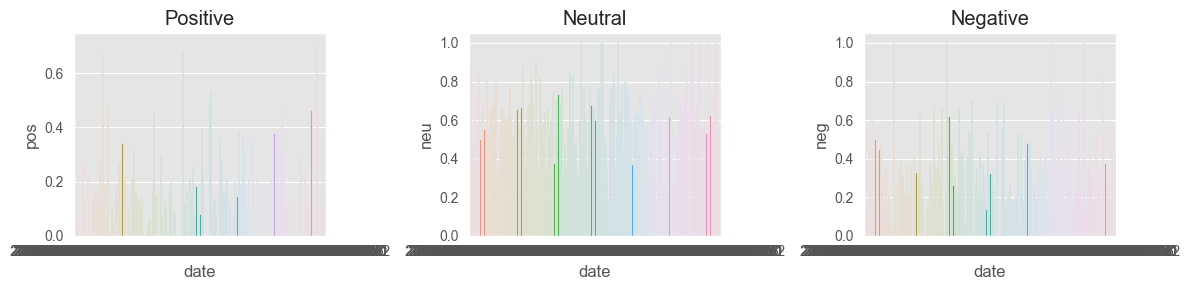

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

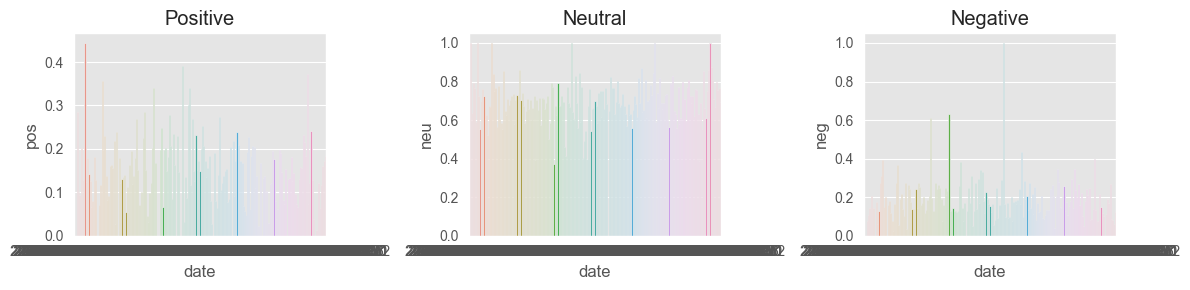

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [8]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [11]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/191 [00:00<?, ?it/s]

Broke for Content id 51
Broke for Content id 67
Broke for Content id 76
Broke for Content id 78
Broke for Content id 90
Broke for Content id 109
Broke for Content id 111
Broke for Content id 134
Broke for Content id 151
Broke for Content id 160
Broke for Content id 170
Broke for Content id 171
Broke for Content id 175
Broke for Content id 178


In [12]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

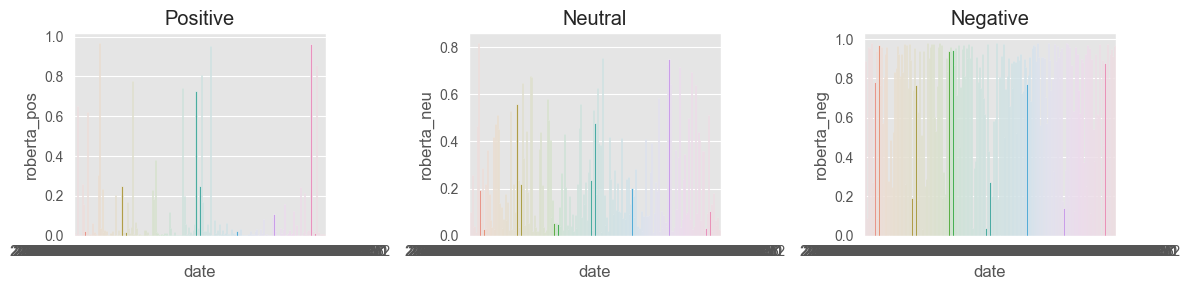

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [14]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

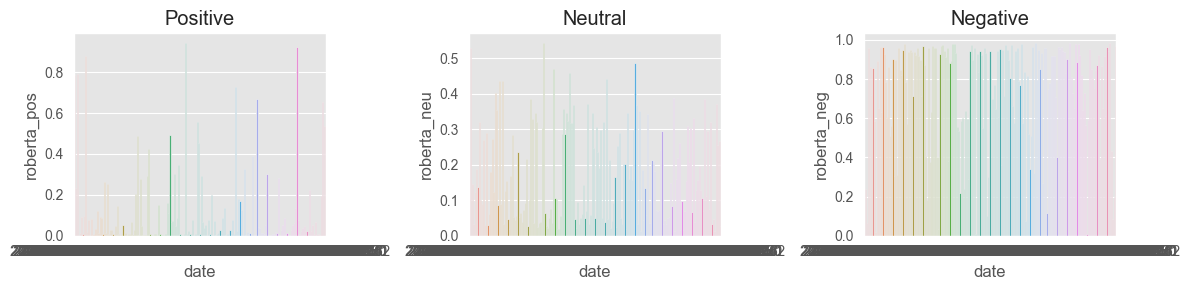

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [16]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

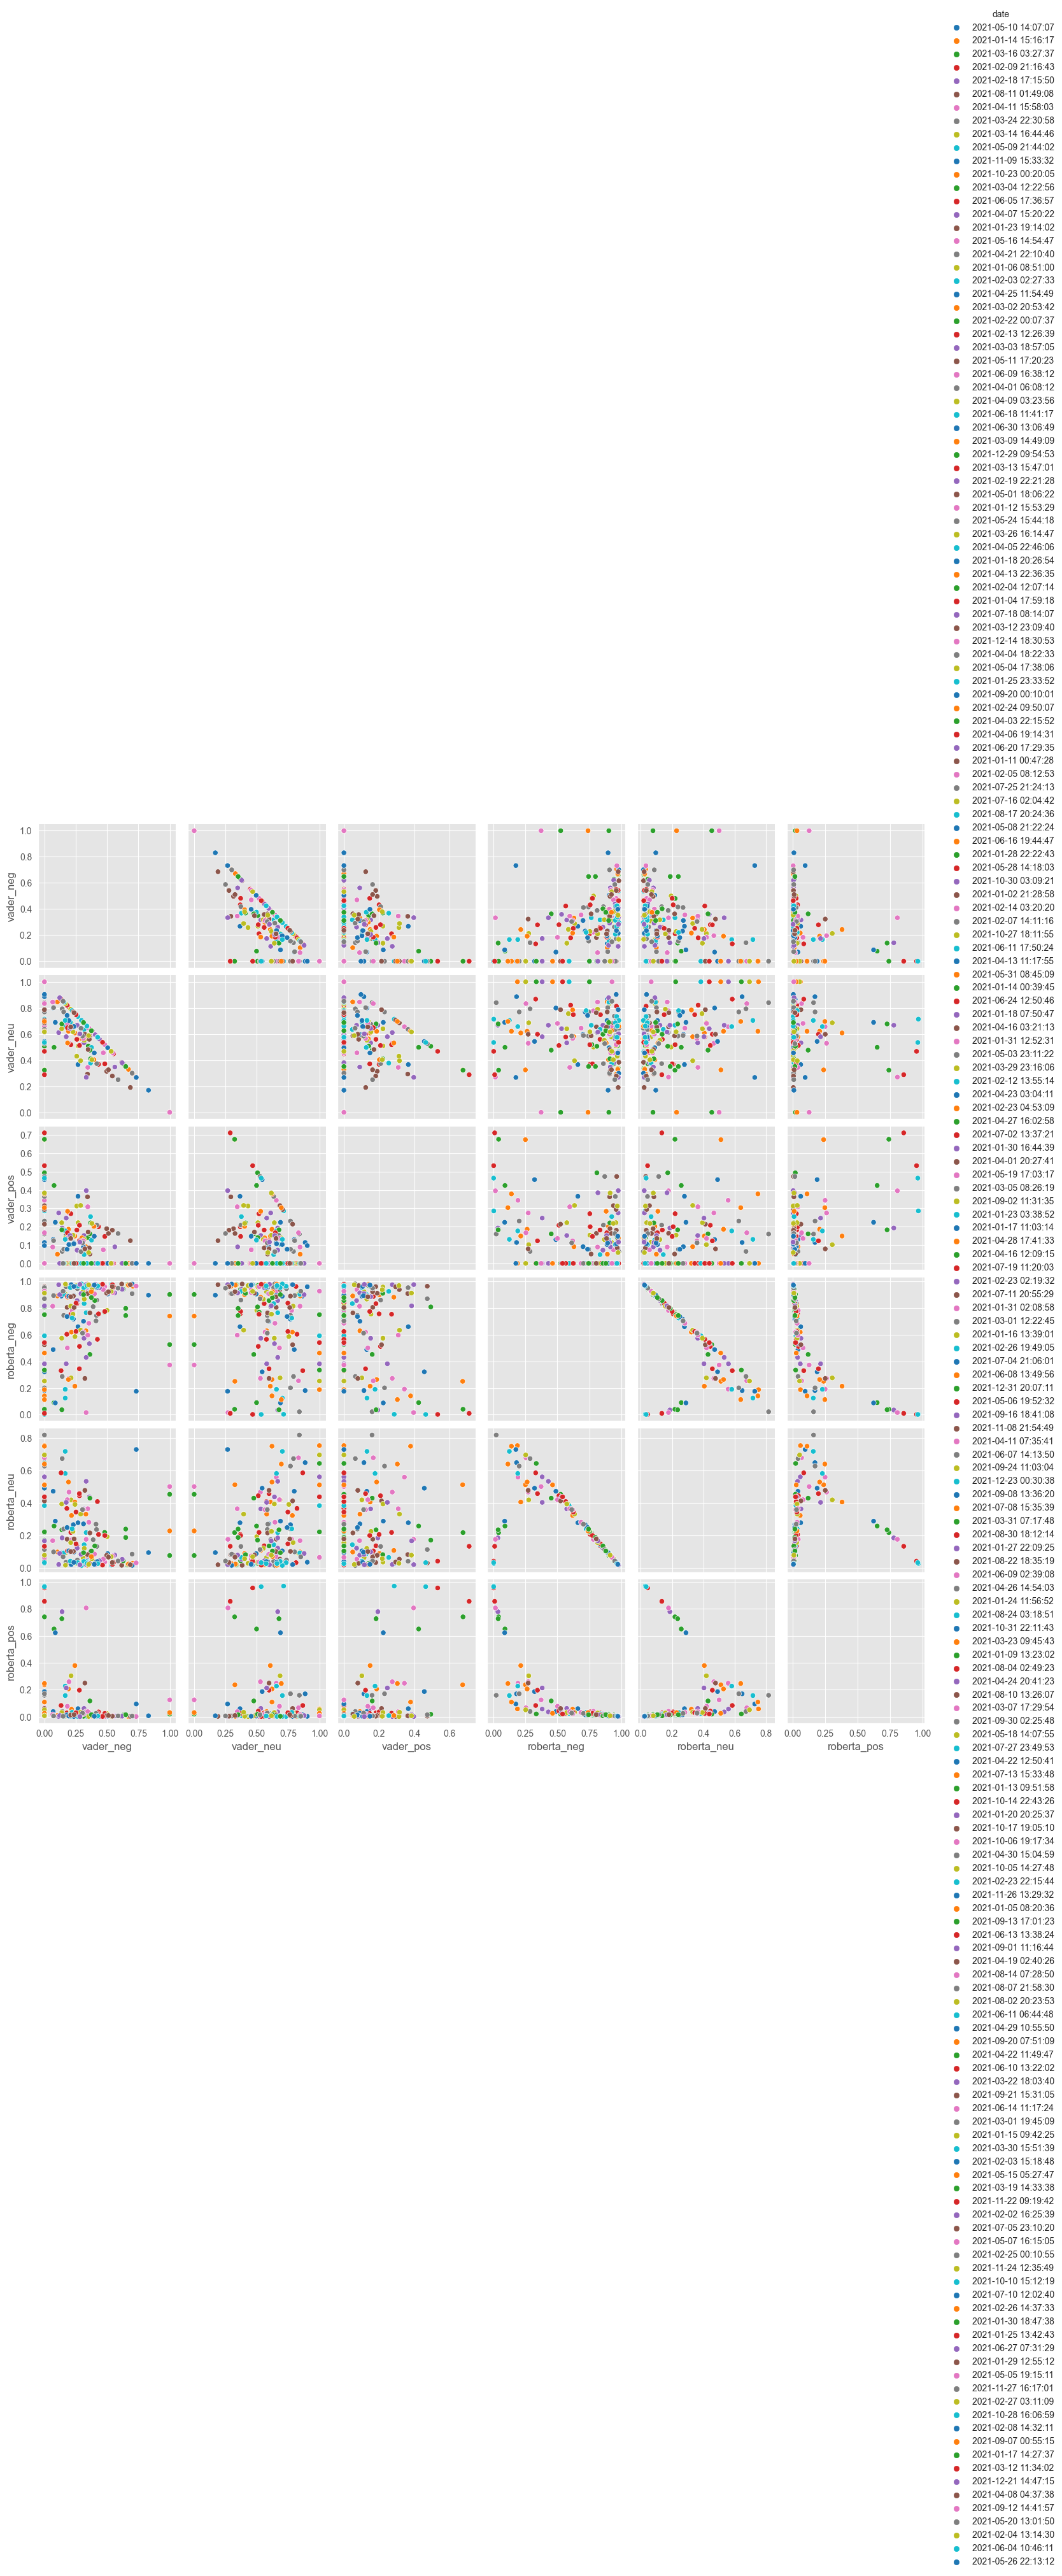

In [17]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [18]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

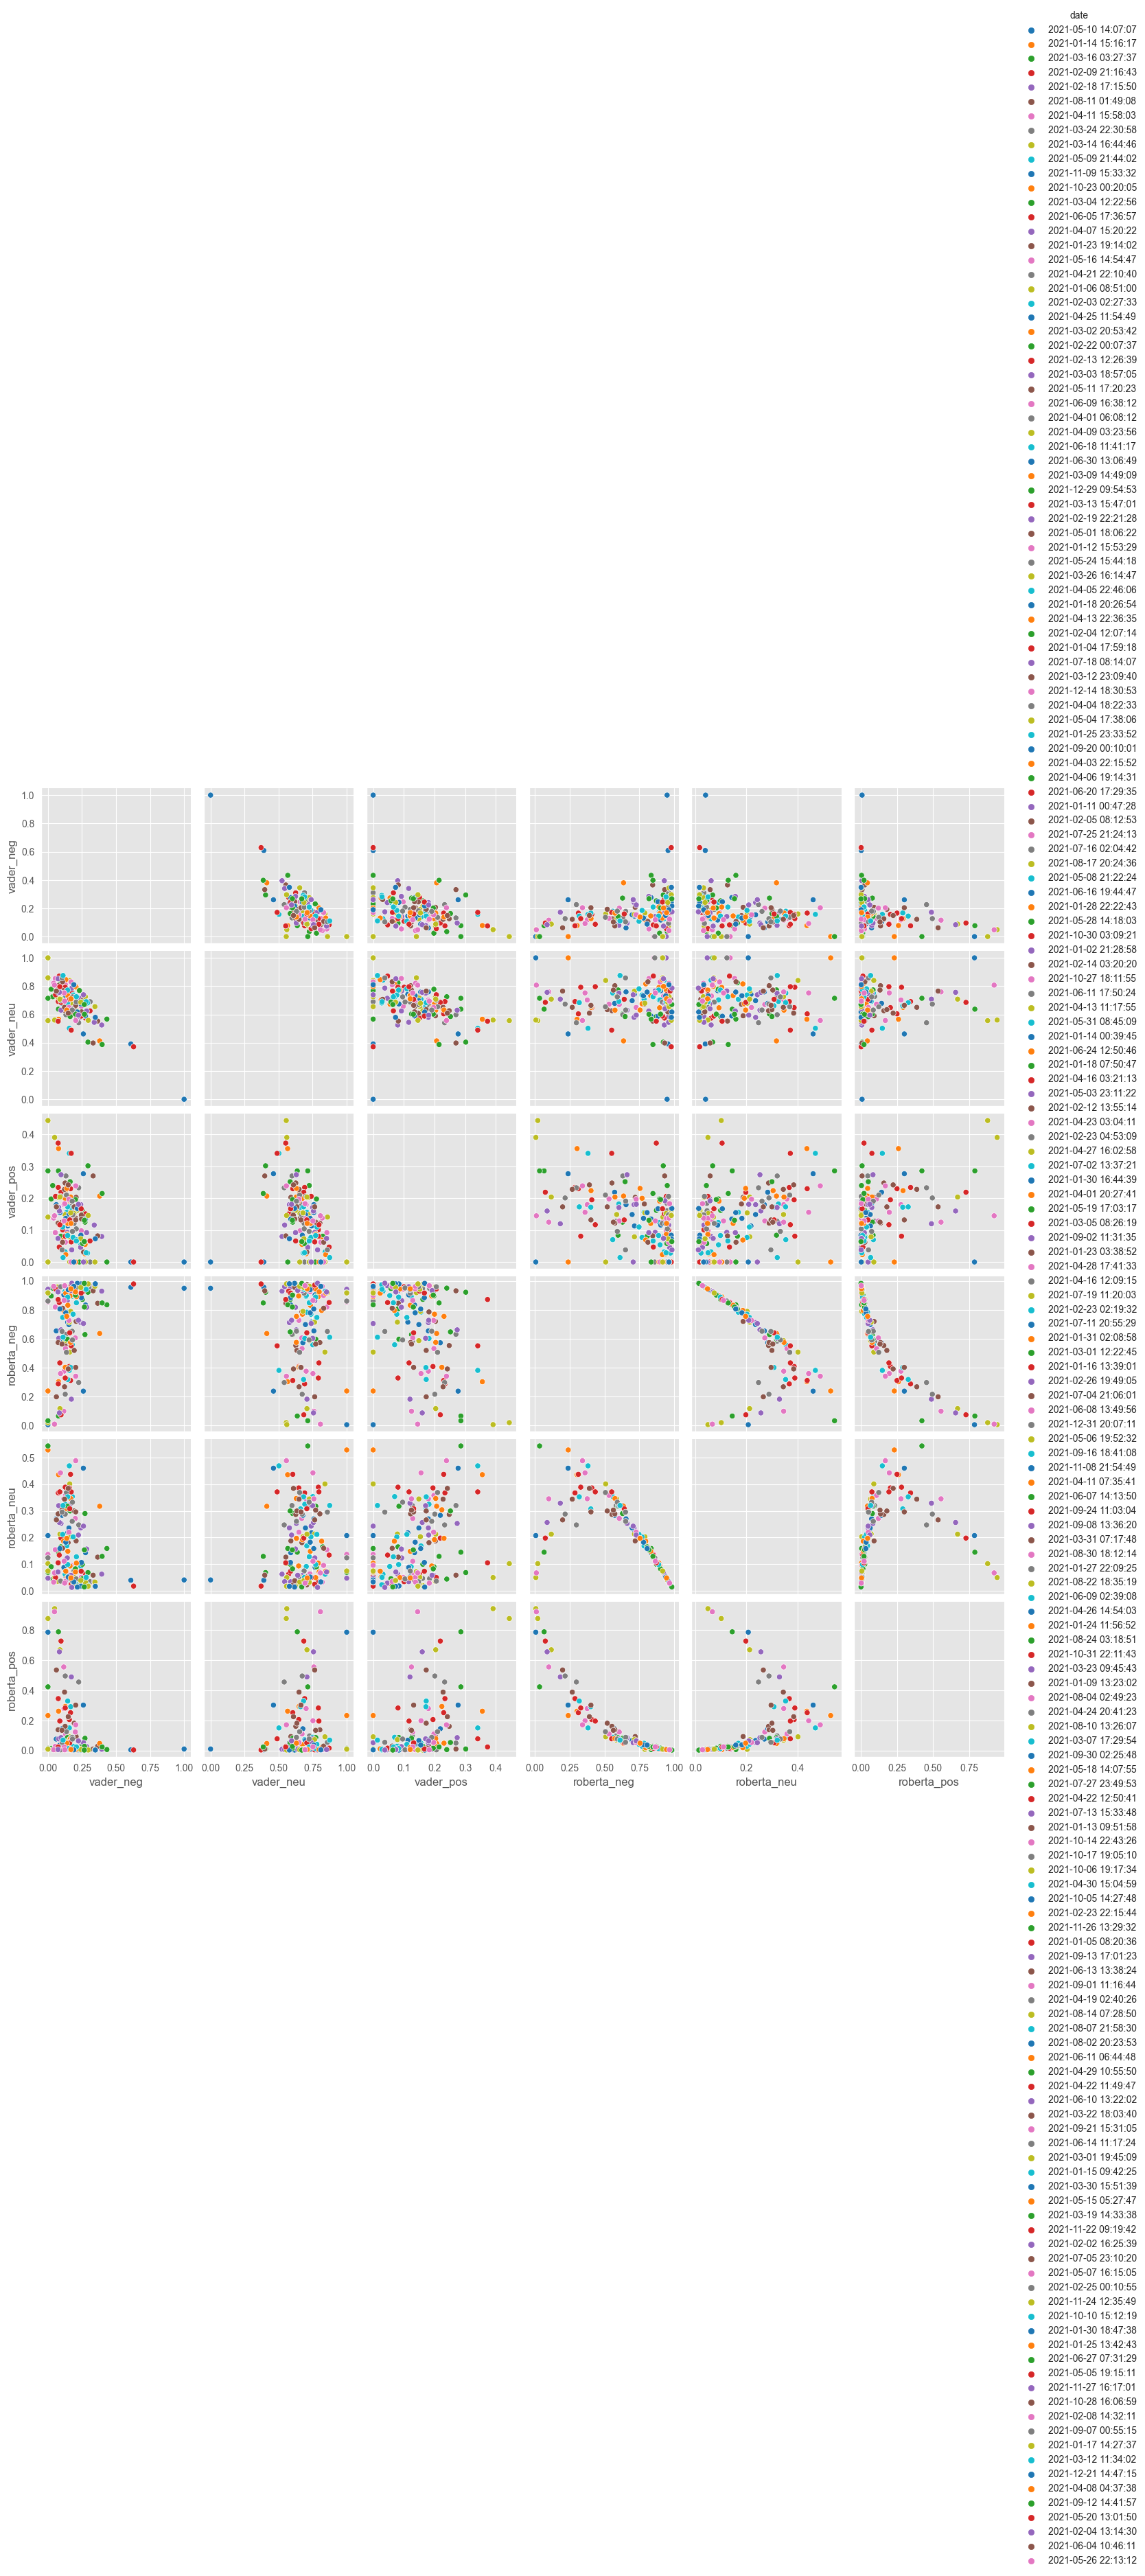

In [19]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()